In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
# Lihat data teratas
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Cek data duplicate
df.duplicated().sum()

0

In [ ]:
# Cek missing value
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Cek deskripsi data (numerik)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Drop kolom 'id' karena tidak akan digunakan
df = df.drop('id', axis=1)

In [ ]:
# Cek jumlah value di gender
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [ ]:
# Ganti nilai other menjadi gender yang paling banyak yaitu 'Female'
df['gender'] = df['gender'].replace('Other', 'Female')

<Axes: xlabel='gender'>

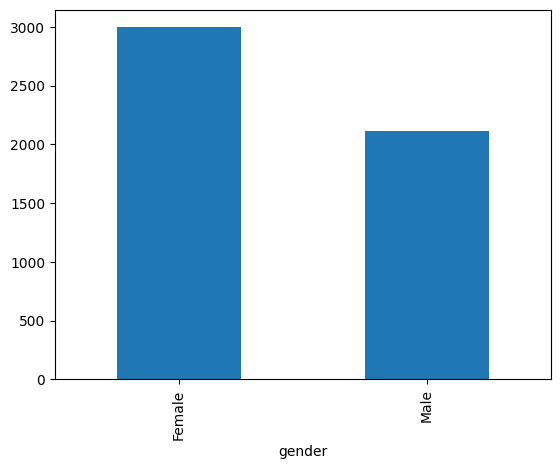

In [ ]:
# Plotting gender untuk cek jumlah distribusi
df['gender'].value_counts().plot(kind = 'bar')

In [ ]:
# Cek jumlah value stroke (variabel target) -> 0 = no, 1 = yes
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke'>

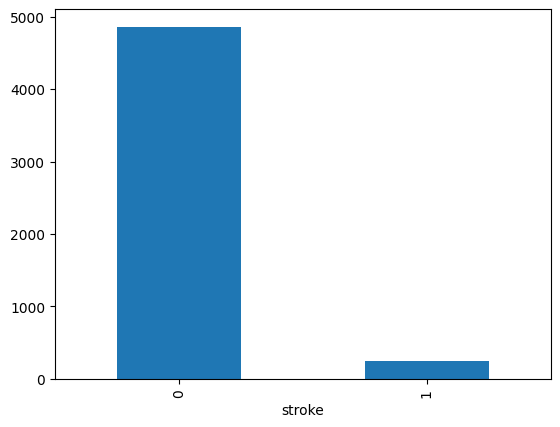

In [ ]:
# Plotting stroke untuk jumlah value
df['stroke'].value_counts().plot(kind = 'bar')

In [ ]:
# Cek presentase orang yang terkena stroke
stroke_count = (df['stroke'].value_counts()[1] / df['stroke'].value_counts().sum()).round(3) * 100
print("Persentase orang terkena stroke:", stroke_count, "%")

Persentase orang terkena stroke: 4.9 %


In [ ]:
# Nilai stroke pada dataset sangat skewed karena dari seluruh dataset
# Hanya sekitar 4.9% yang terkena stroke

In [ ]:
# Cek jumlah value hypertension (0 = no, 1 = yes)
df.hypertension.value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

<Axes: xlabel='hypertension'>

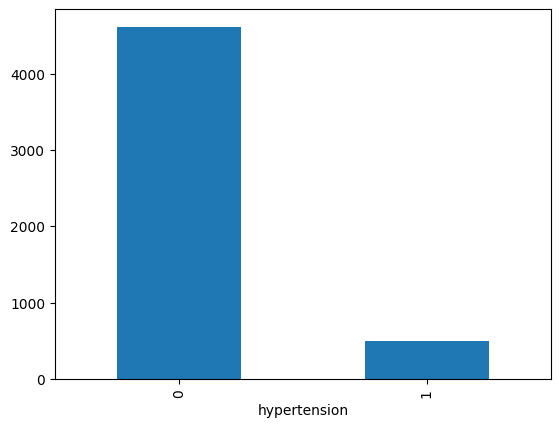

In [ ]:
# Plotting jumlah value hypertension
df['hypertension'].value_counts().plot(kind = 'bar')

In [ ]:
# Cek jumlah value heart disease (0 = no, 1 = yes)
df.heart_disease.value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

<Axes: xlabel='heart_disease'>

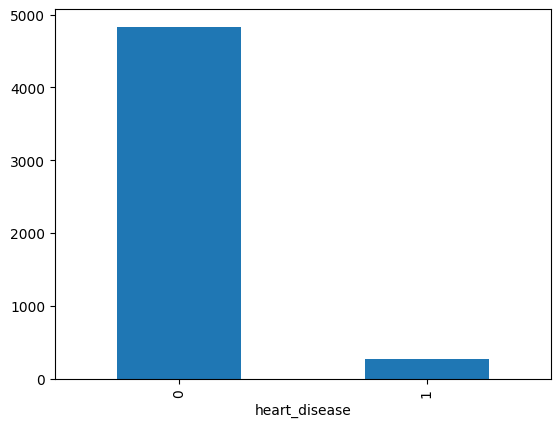

In [ ]:
# Plotting jumlah value heart disease
df['heart_disease'].value_counts().plot(kind = 'bar')

In [ ]:
# Cek jumlah value work type
df.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: ylabel='count'>

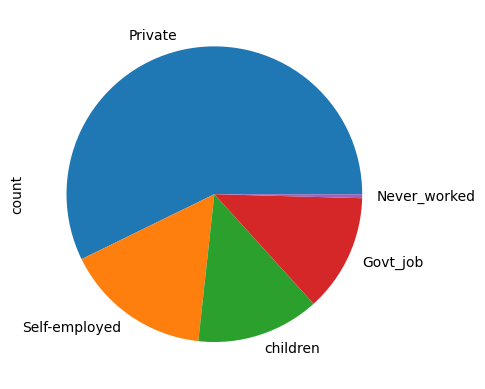

In [ ]:
# Plotting jumlah value work type
df['work_type'].value_counts().plot(kind = 'pie')

In [ ]:
# Cek jumlah value smoking status
df.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: ylabel='count'>

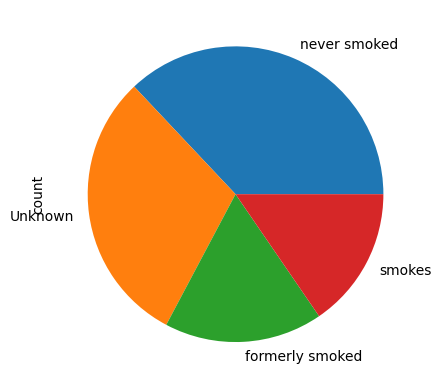

In [ ]:
# Plotting jumlah value smoking status
df['smoking_status'].value_counts().plot(kind = 'pie')

In [ ]:
# Cek jumlah value residence type
df.Residence_type.value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: ylabel='count'>

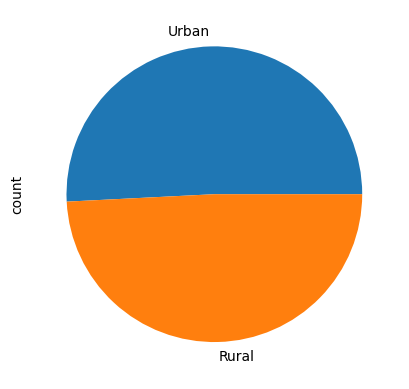

In [ ]:
# Plotting jumlah value residence type
df['Residence_type'].value_counts().plot(kind = 'pie')

In [ ]:
# Cek missing value di BMI
df['bmi'].isnull().sum()

201

<Axes: xlabel='bmi', ylabel='Count'>

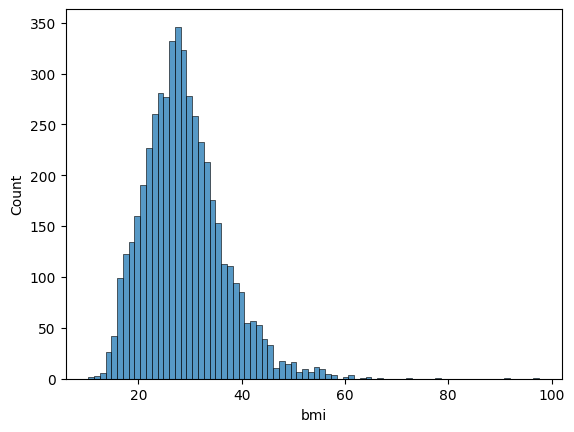

In [ ]:
# Plotting histogram bmi (nilai bmi right-skewed)
sns.histplot(df['bmi'])

<Axes: ylabel='bmi'>

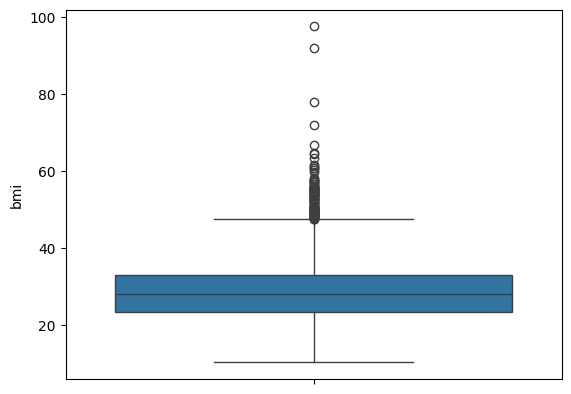

In [ ]:
# Plotting boxplot bmi (terdapat banyak outlier pada bmi)
sns.boxplot(df['bmi'])

In [ ]:
# Mencari jumlah outlier pada bmi
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

# Mencari IQR
IQR = Q3 - Q1
bmi_outlier = (df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
bmi_outlier.value_counts()

bmi
False    5000
True      110
Name: count, dtype: int64

In [ ]:
# Dalam bmi terdapat outlier sebanyak 110

In [ ]:
# Presentase missing value di bmi
df['bmi'].isnull().sum() / len(df['bmi']) * 100

3.9334637964774952

In [ ]:
# Cek jumlah orang yang stroke tetapi BMI nya NA
# df.loc untuk milih baris/kolom tertentu berdasarkan kondisi tertentu
df_bmi_na = df.loc[df['bmi'].isnull()]
a = df_bmi_na['stroke'].sum()
print("Jumlah orang terkena stroke dan BMI nya NA:", a)

b = df['stroke'].sum()
print("Jumlah orang terkena stroke:", b)

Jumlah orang terkena stroke dan BMI nya NA: 40
Jumlah orang terkena stroke: 249


In [ ]:
# Dari 201 missing value pada BMI, 40 orang nya terkena stroke
# Sehingga missing value ini akan diisi menggunakan median
# Karena pada bmi terdapat outlier

In [ ]:
# Mengisi missing value pada BMI dengan median
print("Median BMI:", df['bmi'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

Median BMI: 28.1


<Axes: xlabel='age', ylabel='Count'>

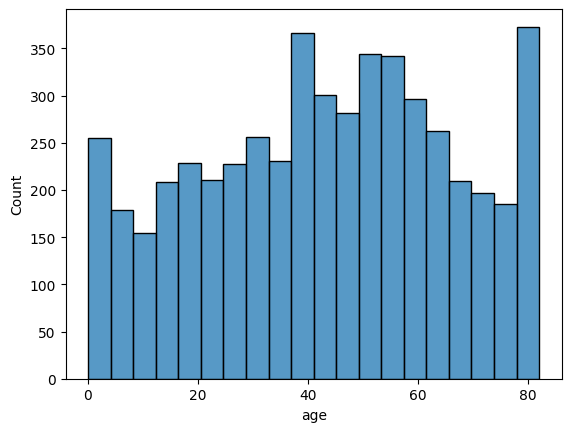

In [ ]:
# Plotting histogram pada age
sns.histplot(df['age'])

<Axes: ylabel='age'>

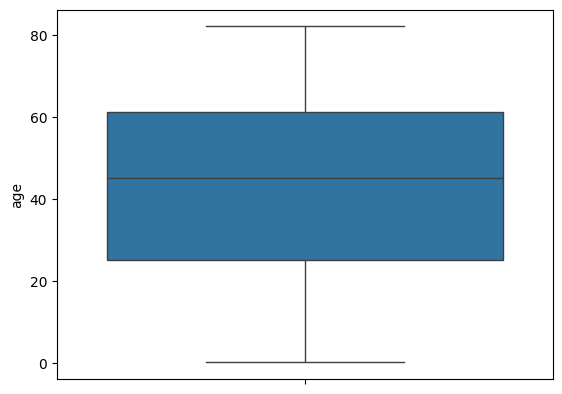

In [ ]:
# Plotting boxplot pada age
sns.boxplot(df['age'])

In [ ]:
# Kolom age tidak ada outlier dan terdistribusi normal

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

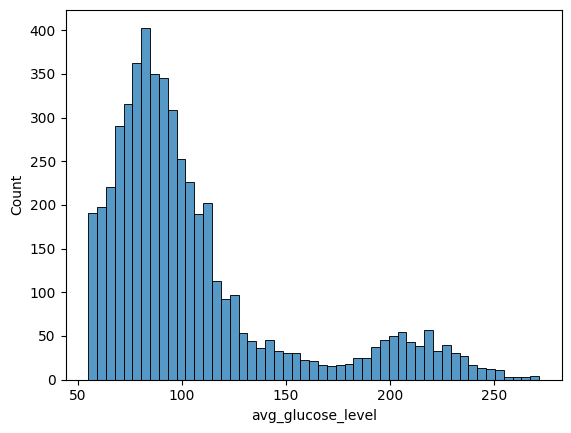

In [ ]:
# Plotting histogram average glocose level (right-skewed)
sns.histplot(df['avg_glucose_level'])

<Axes: ylabel='avg_glucose_level'>

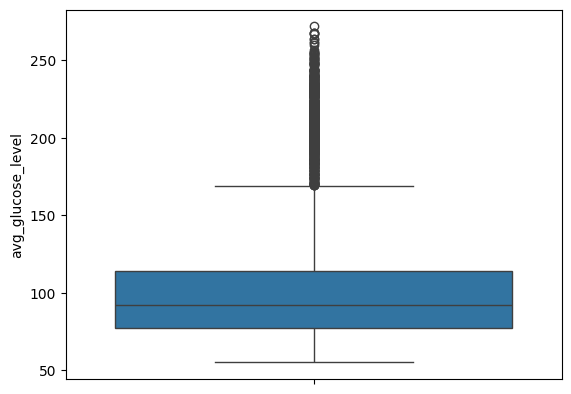

In [ ]:
# Plotting boxplot average glucose level
sns.boxplot(df['avg_glucose_level'])

In [ ]:
# Terdapat banyak outlier pada average glucose level dan distribusinya skewed

In [ ]:
# Mencari jumlah outlier pada average glucose level
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)

# Mencari IQR
IQR = Q3 - Q1
glucose_outlier = (df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
glucose_outlier.value_counts()

avg_glucose_level
False    4483
True      627
Name: count, dtype: int64

In [ ]:
# Jumlah outlier pada average glucose level sebanyak 627

In [ ]:
# Jumlah value ever married
df.ever_married.value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

<Axes: ylabel='count'>

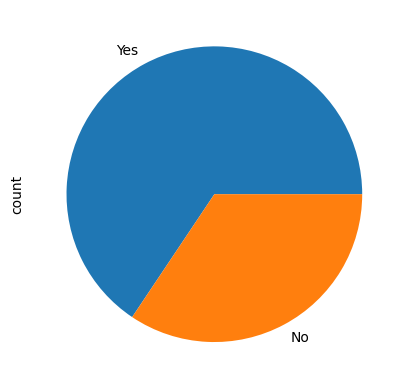

In [ ]:
# Plotting jumlah ever married
df['ever_married'].value_counts().plot(kind = 'pie')

<Axes: xlabel='stroke', ylabel='count'>

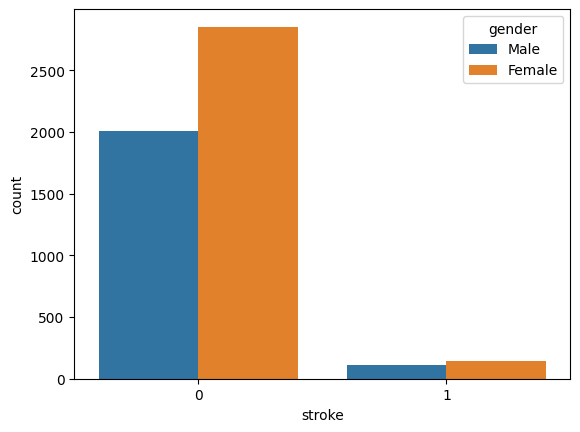

In [ ]:
# Perbandingan stroke dengan gender
sns.countplot(df, x = 'stroke', hue = 'gender')

<Axes: xlabel='stroke', ylabel='count'>

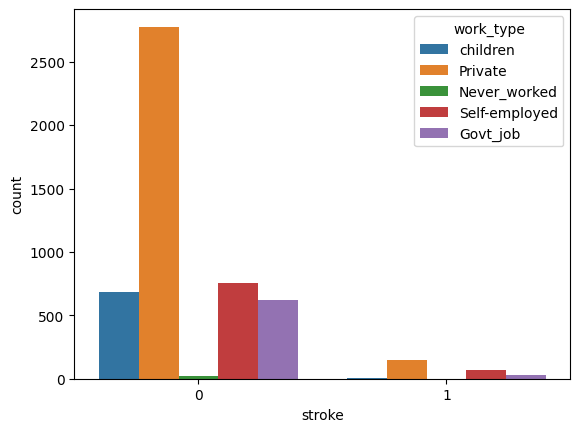

In [ ]:
# Perbandingan stroke dengan work type
sns.countplot(df, x = 'stroke', hue = 'work_type')

<Axes: xlabel='stroke', ylabel='count'>

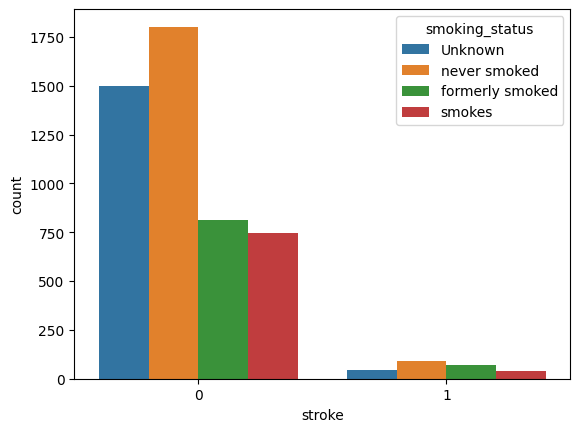

In [ ]:
# Perbandingan stroke dengan smoking status
sns.countplot(df, x = 'stroke', hue = 'smoking_status')

<Axes: xlabel='stroke', ylabel='count'>

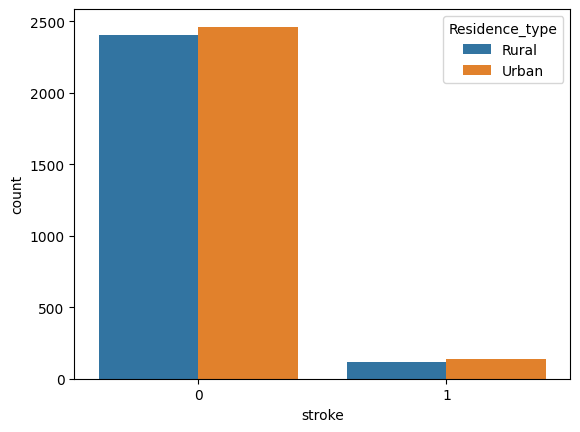

In [ ]:
# Perbandingan stroke dengan residence type
sns.countplot(df, x = 'stroke', hue = 'Residence_type')

<Axes: xlabel='stroke', ylabel='count'>

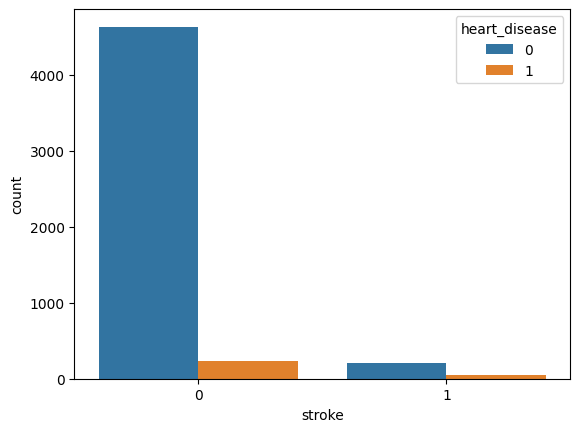

In [ ]:
# Perbandingan stroke dengan heart disease
sns.countplot(df, x = 'stroke', hue = 'heart_disease')

<Axes: xlabel='stroke', ylabel='count'>

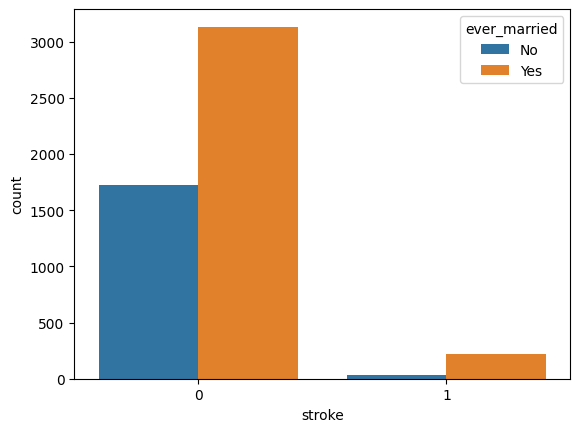

In [ ]:
# Perbandingan stroke dengan ever married
sns.countplot(df, x = 'stroke', hue = 'ever_married')

In [ ]:
# Cek unique value pada variabel kategorik
print(df['gender'].unique())
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())

['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
# Encoding variabel kategorik
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
df['work_type'] = df['work_type'].map({'children': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'Govt_job': 4})
df['Residence_type'] = df['Residence_type'].map({'Rural': 0, 'Urban': 1})
df['smoking_status'] = df['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3})

In [ ]:
# Target variabel dari dataset yang digunakan sangat undersampled
# Sehingga kita akan menggunakan metode over sampling untuk dapat representasi yang sama dari kedua kelas target
# Menggunakan metode Random Over Sampling

In [ ]:
# Jumlah data awal sebelum random over sampling
jumlah_data_awal = len(df)
print("Jumlah data awal:", jumlah_data_awal)

Jumlah data awal: 5110


Text(0, 0.5, 'Jumlah')

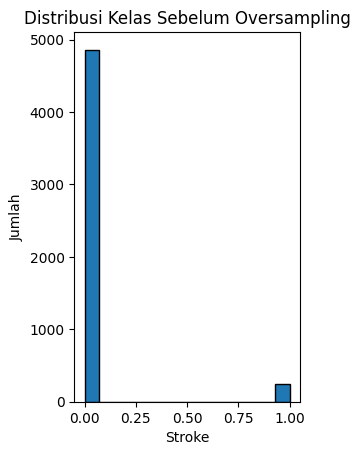

In [ ]:
# Distribusi kelas sebelum oversampling
plt.subplot(1, 2, 1)
plt.hist(df['stroke'], bins = 'auto', edgecolor = 'black')
plt.title('Distribusi Kelas Sebelum Oversampling')
plt.xlabel('Stroke')
plt.ylabel('Jumlah')

In [ ]:
# Melakukan random over sampling
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy = 'minority')
X = df.drop(['stroke'], axis = 1)
y = df['stroke']

# Mengambil dataframe oversampled (testing dan training)
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
# Jumlah data setelah random over sampling
jumlah_data_akhir = len(X_over)
print("Jumlah data setelah oversampling:", jumlah_data_akhir)

Jumlah data setelah oversampling: 9722


Text(0, 0.5, 'Jumlah')

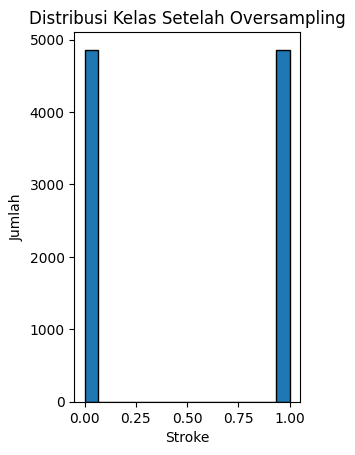

In [ ]:
# Distribusi kelas setelah oversampling
plt.subplot(1, 2, 2)
plt.hist(y_over, bins = 'auto', edgecolor = 'black')
plt.title("Distribusi Kelas Setelah Oversampling")
plt.xlabel('Stroke')
plt.ylabel('Jumlah')

In [ ]:
# Menampilkan perbandingan jumlah data awal dan akhir
print("Jumlah data awal:", jumlah_data_awal)
print("Jumlah data setelah oversampling:", jumlah_data_akhir)

Jumlah data awal: 5110
Jumlah data setelah oversampling: 9722


In [ ]:
from sklearn.preprocessing import StandardScaler

# Karena variabel numerik memiliki range nilai yang berbeda dan terdapat outlier
# Maka digunakan scaler untuk mendapatkan nilai dengan range yang sama
scaler = StandardScaler()

# Scaling variabel numerik dengan StandardScaler
df[['bmi', 'avg_glucose_level']] = scaler.fit_transform(df[['bmi', 'avg_glucose_level']])

In [ ]:
# Splitting dataset (train dan test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 42)

In [ ]:
# Cek ukuran dari data yang sudah di split
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (6805, 10)
y_train: (6805,)
X_test: (2917, 10)
y_test: (2917,)


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [ ]:
# Membuat model Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Membuat objek classifier
model_rf = RandomForestClassifier(n_estimators = 100)
# n_estimators = jumlah pohon keputusan

# Training model
model_rf.fit(X_train, y_train)

# Membuat prediksi pada dataset test
y_pred_rf = model_rf.predict(X_test)

In [ ]:
# Akurasi model Random Forest
print("Accuracy Random Forest Classifier:", accuracy_score(y_test, y_pred_rf) * 100)

Accuracy Random Forest Classifier: 99.00582790538223


In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1457
           1       0.98      1.00      0.99      1460

    accuracy                           0.99      2917
   macro avg       0.99      0.99      0.99      2917
weighted avg       0.99      0.99      0.99      2917



In [ ]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
[[1428   29]
 [   0 1460]]


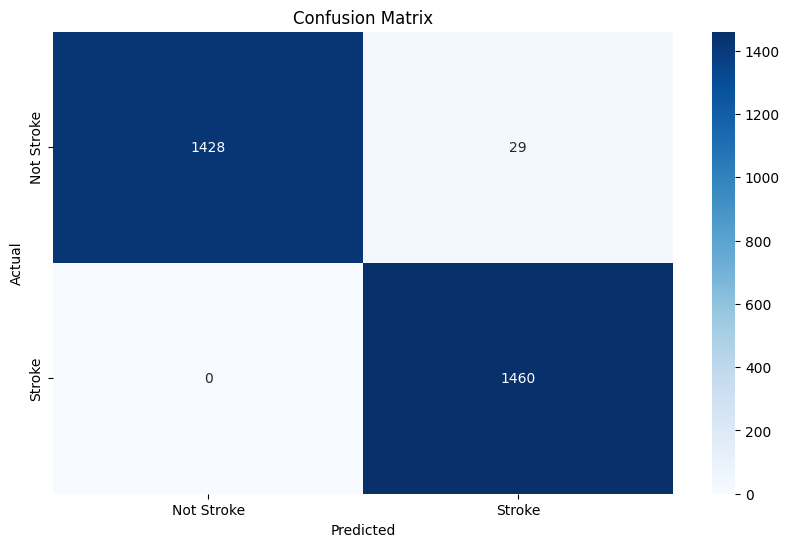

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Stroke', 'Stroke'], yticklabels=['Not Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Cross validation
from sklearn import model_selection
from sklearn.model_selection import KFold

In [ ]:
# Melakukan k fold cross validation menggunakan 20 splits
kfold_val = model_selection.KFold(n_splits = 20, shuffle = True)
result_kfold = model_selection.cross_val_score(model_rf, X_over, y_over, cv = kfold_val)
print("Accuracy:", result_kfold.mean() * 100)
print(result_kfold)

Accuracy: 99.36224554465485
[0.99383984 0.99589322 0.98971193 0.98971193 0.98971193 0.99176955
 0.99382716 0.99382716 0.99176955 0.99588477 1.         0.99588477
 0.98353909 0.99588477 0.99588477 0.99794239 0.99176955 0.98971193
 1.         0.99588477]


In [ ]:
# Simpan model ke file
import joblib

joblib.dump(model_rf, 'Stroke_Prediction')

['Stroke_Prediction']